# Set up



In [ ]:
pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)


In [ ]:
import numpy as np

# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits, ascii
import astropy.coordinates as coord
import astropy.units as u
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles


# Import Data

In [ ]:
def table2array(table, str):
    col = table[str]
    Element = np.array(col)
    return Element 

In [ ]:
#import files for running on colab
from google.colab import drive
drive.mount('/content/drive');

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp "/content/drive/My Drive/582Project/AlfaAlfa-SDSS_data/durbala2020-table1.21-Sep-2020.fits"  "durbala2020-table1.21-Sep-2020.fits"
!cp "/content/drive/My Drive/582Project/AlfaAlfa-SDSS_data/durbala2020-table2.21-Sep-2020.fits"  "durbala2020-table2.21-Sep-2020.fits"

In [ ]:
table1_file = fits.open('./durbala2020-table1.21-Sep-2020.fits')
table2_file = fits.open('./durbala2020-table2.21-Sep-2020.fits')

In [ ]:
table1_data = table1_file[1].data
table1_primary = table1_file[0].data
table1_cols = table1_data.columns
#table1_cols.info()

In [ ]:
v_helio = table2array(table1_data, 'Vhelio') #heliocentric velocity (cz) of the H I profile midpoint in kms−1

distance = table2array(table1_data, 'Dist') #distance in megaparsec estimated as described in Haynes et al. (2018).

extinction_g = table2array(table1_data, 'extinction_g') #g-band Galactic extinction in mag

extinction_i = table2array(table1_data, 'extinction_i') #i-band Galactic extinction in mag

expAB_r = table2array(table1_data, 'expAB_r') #expAB_r axial ratio b/a in the r band from SDSS

cModelMag_i = table2array(table1_data, 'cModelMag_i') #SDSS i-band cmodel magnitude

In [ ]:
table2_data = table2_file[1].data
table2_primary = table2_file[0].data
table2_cols = table2_data.columns

In [ ]:
#leave out galactic extinctions
gamma_g = table2array(table2_data, 'gamma_g') #g-band internal extinction factor γg in mag

gamma_i = table2array(table2_data, 'gamma_i') #i-band internal extinction factor γi in mag

absMag_i_corr = table2array(table2_data, 'absMag_i_corr') #corrected absolute i-band magnitude in mag obtained using SDSS 
                                                         #i-band cmodel magnitude corrected for galactic and internal extinction

gmi_corr = table2array(table2_data, 'gmi_corr') #corrected g−i color obtained in mag using the SDSS g- and i-band model 
                                                #magnitude corrected for galactic and internal extinction,log

MstarTaylor = table2array(table2_data, 'logMstarTaylor') #stellar mass from SDSS optical photometry in logarithmic solar units 
                                                            #using the Taylor method 

logMstarMcGaugh = table2array(table2_data,'logMstarMcGaugh') #stellar mass from infrared unWISE photo- metry in 
                                                            #logarithmic solar units using the McGaugh method

logMstarGSWLC = table2array(table2_data, 'logMstarGSWLC') #stellar mass from GSWLC-2 in logarithmic solar units

logSFR22 = table2array(table2_data,'logSFR22') #SFR from unWISE infrared photometry using the flux at the frequency 
                                                #at 22 μm SFR22 in logarithmic M_sun yr−1

logSFRNUVIR = table2array(table2_data, 'logSFRNUVIR') #corrected near-ultraviolet SFR from GALEX NUV 
                                                        #photometry SFR NUVcor in logarithmic M_sun yr−1 for galaxies with NUV 
                                                        #fluxes available in NASA- Sloan Atlas

logSFRGSWLC = table2array(table2_data,'logSFRGSWLC') #SFR from GSWLC-2 in logarithmic M_sun yr−1

logMH = table2array(table2_data, 'logMH') #H I mass in logarithmic solar units log MH I

In [ ]:
#define X0 array for features
X0=np.array([v_helio,distance,expAB_r,cModelMag_i,absMag_i_corr,gmi_corr,MstarTaylor,logMstarMcGaugh,logMstarGSWLC,logSFR22,logSFRNUVIR,logSFRGSWLC,logMH])

# Assess and Split Data

In [ ]:
#Ensure features are same size and store size of dataset
if (len(MstarTaylor)==len(gmi_corr)==len(expAB_r)):
    datasize = len(MstarTaylor);
else: 
    print("feature size mismatch")

#print(datasize)

Names for axes of plots

In [ ]:
#list for feature names
names = ["Heliocentric Velocity (cz)", "Ditance (MPC)", "expAB_r axial ratio b/a in the r band","i-band cmodel magnitude",
         "corrected absolute i-band magnitude(mag)","corrected g−i color (mag)","stellar mass, optical photometry, Taylor method (Solar Units)",
         "stellar mass, infrared unWISE photometry, McGaugh method (log solar units)",
         "stellar mass from GSWLC-2 (log solar units)","SFR unWISE IR photometry freq 22μm SFR22 (log M_sun/yr)","corrected near-UV SFR GALEX, NUV photometry SFR NUVcor (log M_sun/yr)",
         "SFR from GSWLC-2 (log M_sun/yr)","HI mass  (log solar units)"]

## Split Data 

In [ ]:
#Define Splits
train_size = 21501
val_size = 5000
test_size = 5000

X_train0 = X0[:,:train_size]
X_val0 = X0[:,train_size:train_size+val_size]
X_test0 = X0[:,train_size+val_size:]

# Correlation Plot

                                                    Heliocentric Velocity (cz)  ...  HI mass  (log solar units)
Heliocentric Velocity (cz)                                            1.000000  ...                    0.741216
Ditance (MPC)                                                         0.996154  ...                    0.742918
expAB_r axial ratio b/a in the r band                                 0.087845  ...                   -0.009933
i-band cmodel magnitude                                               0.044794  ...                   -0.303629
corrected absolute i-band magnitude(mag)                             -0.568039  ...                   -0.782814
corrected g−i color (mag)                                             0.156903  ...                    0.316960
stellar mass, optical photometry, Taylor method...                    0.518007  ...                    0.736200
stellar mass, infrared unWISE photometry, McGau...                    0.577801  ...                    0

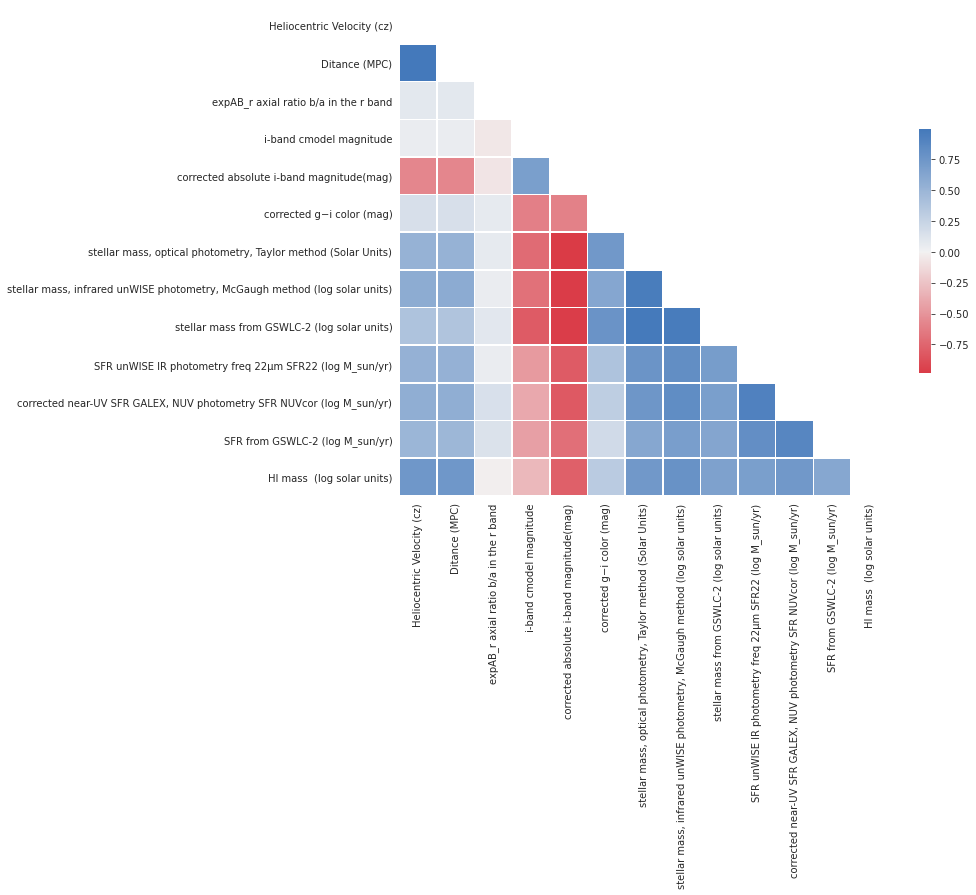

In [ ]:
import seaborn as sns
import pandas as pd

data = pd.DataFrame(X_train0.transpose(), columns=names)

corr = data.corr()
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

print(corr)
np.savetxt(r'/content/corr_coef.txt', corr.values, fmt='%+06.4f')



# Labeled Data On Deepforest

Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir labeled_data

mkdir: cannot create directory ‘labeled_data’: File exists


In [ ]:
!cp /content/drive/MyDrive/582Project/labeled_data/labeled_coords_3000.txt /content/labeled_data/lab_dat.txt

In [ ]:
import numpy as np

#Extract morphology labels
morph = []

delimiter = " " 

with open('/content/labeled_data/lab_dat.txt') as file:
    
    file.readline() #this removes the header
    data = file.readlines()
    #print(data)
    for line in data:     
        morph.append(line.strip().split(delimiter)[2])

morph = np.array(morph) #turns the list into a numpy array.

#print(morph)

Combine labels with first 3000 ratio and g-i color index data

Remove any NAN data

In [ ]:
# data indices: 2 is ab-ratio, 5 is g-i color index
X_abrat=X0[2][:3000]
X_gicol=X0[5][:3000]
X_TM=X0[6][:3000]
X_SFR=X0[9][:3000]

X_abrat_ref=[]
X_gicol_ref=[]
X_TM_ref=[]
X_SFR_ref=[]
morph_ref=[]

#Remove NANs, reduces size of usable labeled samples
for ratio,color,mass,sfr,mtype in zip(X_abrat,X_gicol,X_TM,X_SFR,morph):
    if (np.isnan(ratio)==False) and (np.isnan(color)==False) and (np.isnan(mass)==False) and (np.isnan(sfr)==False):
        X_SFR_ref.append(sfr)
        X_TM_ref.append(mass)
        X_gicol_ref.append(color)
        X_abrat_ref.append(ratio)
        morph_ref.append(mtype)
    else:
        continue
X2 = np.array([X_abrat,X_gicol,X_TM ,morph])
Xref= np.array([X_abrat_ref,X_gicol_ref,X_TM_ref ,morph_ref])
Xreft=Xref.transpose()

X_ref_wSFR = np.array([X_abrat_ref,X_gicol_ref,X_TM_ref,X_SFR_ref ,morph_ref])
Xreft_sfr=X_ref_wSFR.transpose()

print("Original: ",len(morph))
print("Refined Size: ",len(morph_ref))

Original:  3000
Refined Size:  2453


In [ ]:
#print(X2.transpose()[800:1000])

Printout of refined data

In [ ]:
#for i in range(len(X_ref_wSFR[0])):
#    print(X_ref_wSFR[0][i],"  ",X_ref_wSFR[1][i],"  ",X_ref_wSFR[2][i],' ',X_ref_wSFR[3][i],' ',X_ref_wSFR[4][i])

Split refined labeled data

In [ ]:
val_size = 0
test_size = 1000
train_size = (len(Xreft_sfr)-(val_size+test_size))

In [ ]:
X_train = Xreft_sfr[500:len(Xreft_sfr),:4].astype(float)
y_train = Xreft_sfr[500:len(Xreft_sfr),4]

#X_val = Xreft[train_size:(train_size+val_size),:3].astype(float)
#y_val = Xreft[train_size:(train_size+val_size),3]

X_test = Xreft_sfr[:500,:4].astype(float)
y_test = Xreft_sfr[:500,4]
print(X_test)

[[ 0.4685137   1.05708008 10.84794235 -0.4023262 ]
 [ 0.638896    0.82890602 10.3945694   0.12330413]
 [ 0.7322314   0.76656354 10.23997688  1.50374568]
 ...
 [ 0.3813236   1.12610443 10.73975658  0.03282608]
 [ 0.167045    1.03415165 10.07721806 -0.91149259]
 [ 0.2857967   0.60008272 10.01566887 -0.1203827 ]]


In [ ]:
Xtr_nm = X_train.transpose()[:2].transpose()
Xtest_nm = X_test.transpose()[:2].transpose()

# Deep Forest on labeled

In [ ]:
pip install XGboost

In [ ]:
pip install deep-forest

In [ ]:
from deepforest import CascadeForestClassifier
from sklearn.ensemble import RandomForestClassifier
DF_model = CascadeForestClassifier(random_state=1, bin_subsample=500, n_estimators=10)
RF_model = RandomForestClassifier(random_state=1,n_estimators=10,min_samples_split=2)

In [ ]:
DF_model.fit(X_train, y_train)

[2021-04-29 22:44:46.184] Start to fit the model:
[2021-04-29 22:44:46.185] Fitting cascade layer = 0 
[2021-04-29 22:44:52.860] layer = 0  | Val Acc = 77.317 % | Elapsed = 6.675 s
[2021-04-29 22:44:52.889] Fitting cascade layer = 1 
[2021-04-29 22:45:05.340] layer = 1  | Val Acc = 78.443 % | Elapsed = 12.450 s
[2021-04-29 22:45:05.371] Fitting cascade layer = 2 
[2021-04-29 22:45:18.811] layer = 2  | Val Acc = 77.778 % | Elapsed = 13.440 s
[2021-04-29 22:45:18.812] Early stopping counter: 1 out of 2
[2021-04-29 22:45:18.845] Fitting cascade layer = 3 
[2021-04-29 22:45:32.743] layer = 3  | Val Acc = 78.085 % | Elapsed = 13.898 s
[2021-04-29 22:45:32.744] Early stopping counter: 2 out of 2
[2021-04-29 22:45:32.745] Handling early stopping
[2021-04-29 22:45:32.764] The optimal number of layers: 2


In [ ]:
RF_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [ ]:
y_pred_DF = DF_model.predict(X_test)

[2021-04-29 22:45:32.882] Start to evalute the model:
[2021-04-29 22:45:32.883] Evaluating cascade layer = 0 
[2021-04-29 22:45:33.210] Evaluating cascade layer = 1 


In [ ]:
y_pred_RF = RF_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc_DF = accuracy_score(y_test, y_pred_DF)
acc_RF = accuracy_score(y_test, y_pred_RF)
print("Accuracy Score for DF: ",acc_DF)
print("Accuracy Score for RF: ",acc_RF)

Accuracy Score for DF:  0.834
Accuracy Score for RF:  0.81


In [ ]:
from collections import Counter

labs = Counter(y_train).keys()
numlab = len(labs)
print(labs)
print(numlab)

print(y_test)
print(y_pred_DF)

dict_keys(['S', 'IRR', 'DWARF', 'COMPACT', 'E', 'LENT', 'PEC', 'FAINT'])
8
['S' 'S' 'S' 'PEC' 'S' 'S' 'S' 'S' 'LENT' 'S' 'S' 'S' 'DWARF' 'S' 'S'
 'LENT' 'S' 'S' 'S' 'S' 'S' 'S' 'IRR' 'S' 'S' 'S' 'LENT' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'LENT' 'S' 'S' 'E' 'S' 'S' 'S' 'S' 'IRR' 'S' 'S'
 'PEC' 'S' 'S' 'LENT' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'LENT' 'S' 'DWARF' 'S'
 'S' 'S' 'LENT' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'IRR' 'S' 'S' 'S' 'S'
 'IRR' 'S' 'S' 'S' 'S' 'S' 'DWARF' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'DWARF' 'S' 'S' 'S' 'S' 'DWARF' 'E' 'S' 'S' 'S' 'IRR'
 'DWARF' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'DWARF' 'S' 'S' 'S' 'S'
 'DWARF' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'LENT'
 'S' 'IRR' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'LENT' 'S' 'S' 'S' 'S' 'DWARF' 'S' 'S' 'LENT' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'DWARF' 'S' 'S' 'S' 'S' 'S' 'IRR' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'DWARF' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'IRR

Confusion Matrix

[2021-04-29 22:45:33.607] Start to evalute the model:
[2021-04-29 22:45:33.609] Evaluating cascade layer = 0 
[2021-04-29 22:45:33.951] Evaluating cascade layer = 1 
Confusion matrix, without normalization
[[  0   0   0   0   0   0   1]
 [  0   5   0   2   0   0  17]
 [  0   0   0   0   0   0   5]
 [  0   4   0   3   0   0  23]
 [  0   0   0   0   2   0  24]
 [  0   0   0   0   0   0   4]
 [  0   0   0   1   2   0 407]]
[2021-04-29 22:45:34.352] Start to evalute the model:
[2021-04-29 22:45:34.352] Evaluating cascade layer = 0 
[2021-04-29 22:45:34.658] Evaluating cascade layer = 1 
Normalized confusion matrix
[[0.         0.         0.         0.         0.         0.
  1.        ]
 [0.         0.20833333 0.         0.08333333 0.         0.
  0.70833333]
 [0.         0.         0.         0.         0.         0.
  1.        ]
 [0.         0.13333333 0.         0.1        0.         0.
  0.76666667]
 [0.         0.         0.         0.         0.07692308 0.
  0.92307692]
 [0.        

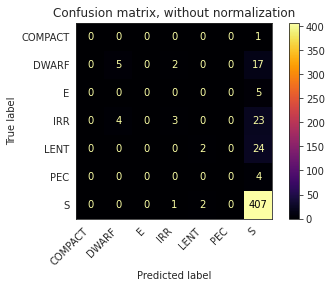

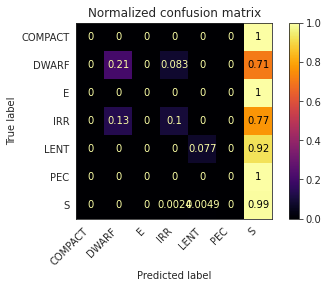

In [ ]:
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", 'true')]


for title, normalize in titles_options:
    disp = plot_confusion_matrix(DF_model, X_test, y_test,
                                 cmap=plt.cm.inferno,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    disp.figure_.autofmt_xdate(rotation=45)
    print(title)
    print(disp.confusion_matrix)

plt.show()

# SemiSupervised Clustering 

In [ ]:
#unabled data (samples #3000 and up)
X_unl = np.array([X0[2][len(Xreft_sfr):],X0[5][len(Xreft_sfr):],X0[6][len(Xreft_sfr):],X0[9][len(Xreft_sfr):]]).astype(float)

#print(X_unl[0])

In [ ]:
#clean up the nans again

Xunl_abrat=X0[2][len(Xreft_sfr):]
Xunl_gicol=X0[5][len(Xreft_sfr):]
Xunl_TM = X0[6][len(Xreft_sfr):]
Xunl_SFR = X0[9][len(Xreft_sfr):]

Xunl_abrat_ref=[]
Xunl_gicol_ref=[]
Xunl_TM_ref=[]
Xunl_SFR_ref=[]
morphunl_ref=[]

#Remove NANs, reduces size of usable labeled samples
for ratio,color,mass,sfr, mtype in zip(Xunl_abrat,Xunl_gicol,Xunl_TM,Xunl_SFR, morph):
    if (np.isnan(ratio)==False) and (np.isnan(color)==False)and (np.isnan(mass)==False) and (np.isnan(sfr)==False):
        Xunl_abrat_ref.append(ratio)
        Xunl_gicol_ref.append(color)
        Xunl_TM_ref.append(mass)
        Xunl_SFR_ref.append(sfr)
        morphunl_ref.append(mtype)

Xunl_ref= np.array([Xunl_abrat_ref,Xunl_gicol_ref,Xunl_TM_ref, Xunl_SFR_ref])
Xunl_reft=Xunl_ref.transpose()

print("Original Size: ",len(Xunl_abrat))
print("Refined Size: ",len(Xunl_abrat_ref))
#print(len(Xunl_SFR))

Original Size:  29048
Refined Size:  2570


In [ ]:
X_train_unl = Xunl_reft
Xwa = np.concatenate((X_train,X_train_unl))

In [ ]:
gspiral,glent,gdwarf,girr,gpec,gelp,gcomp = ([] for i in range(7))
##############################
for i in range(len(X_train)):
    if (y_train[i] == 'S'):
        gspiral.append(True)
    else:
        gspiral.append(False)
Xspiral = X_train[gspiral]
###############################
for i in range(len(X_train)):
    if (y_train[i] == 'LENT'):
        glent.append(True)
    else:
        glent.append(False)
Xlent = X_train[glent]
###############################
for i in range(len(X_train)):
    if (y_train[i] == 'DWARF'):
        gdwarf.append(True)
    else:
        gdwarf.append(False)
Xdwarf = X_train[gdwarf]
###############################
for i in range(len(X_train)):
    if (y_train[i] == 'IRR'):
        girr.append(True)
    else:
        girr.append(False)
Xirr = X_train[girr]
##############################
for i in range(len(X_train)):
    if (y_train[i] == 'PEC'):
        gpec.append(True)
    else:
        gpec.append(False)
Xpec = X_train[gpec]
##############################
for i in range(len(X_train)):
    if (y_train[i] == 'ELLIPT'):
        gelp.append(True)
    else:
        gelp.append(False)
Xelp = X_train[gelp]
##############################
for i in range(len(X_train)):
    if (y_train[i] == 'COMPACT'):
        gcomp.append(True)
    else:
        gcomp.append(False)
Xcomp = X_train[gcomp]
##############################

In [ ]:
#%matplotlib notebook

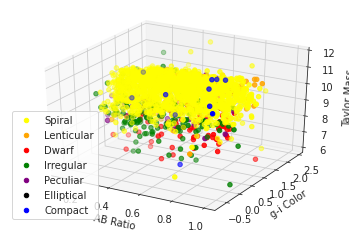

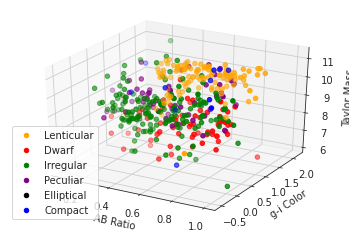

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

x=Xwa.transpose()[0]
y=Xwa.transpose()[1]
z=Xwa.transpose()[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(x, y, z, c='blue', marker='o')

#ax.scatter(X_train.transpose()[0],X_train.transpose()[1], X_train.transpose()[2], c='orange', marker='o')
ax.scatter(Xspiral.transpose()[0],Xspiral.transpose()[1], Xspiral.transpose()[2], c='yellow', marker='o')
ax.scatter(Xlent.transpose()[0],Xlent.transpose()[1], Xlent.transpose()[2], c='orange', marker='o')
ax.scatter(Xdwarf.transpose()[0],Xdwarf.transpose()[1], Xdwarf.transpose()[2], c='red', marker='o')
ax.scatter(Xirr.transpose()[0],Xirr.transpose()[1], Xirr.transpose()[2], c='green', marker='o')
ax.scatter(Xpec.transpose()[0],Xpec.transpose()[1], Xpec.transpose()[2], c='purple', marker='o')
ax.scatter(Xelp.transpose()[0],Xelp.transpose()[1], Xelp.transpose()[2], c='black', marker='o')
ax.scatter(Xcomp.transpose()[0],Xcomp.transpose()[1], Xcomp.transpose()[2], c='blue', marker='o')



ax.legend(("Spiral","Lenticular","Dwarf","Irregular","Peculiar","Elliptical","Compact"))
ax.set_xlabel('AB Ratio')
ax.set_ylabel('g-i Color')
ax.set_zlabel('Taylor Mass')

plt.show()


fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')

ax2.scatter(Xlent.transpose()[0],Xlent.transpose()[1], Xlent.transpose()[2], c='orange', marker='o')
ax2.scatter(Xdwarf.transpose()[0],Xdwarf.transpose()[1], Xdwarf.transpose()[2], c='red', marker='o')
ax2.scatter(Xirr.transpose()[0],Xirr.transpose()[1], Xirr.transpose()[2], c='green', marker='o')
ax2.scatter(Xpec.transpose()[0],Xpec.transpose()[1], Xpec.transpose()[2], c='purple', marker='o')
ax2.scatter(Xelp.transpose()[0],Xelp.transpose()[1], Xelp.transpose()[2], c='black', marker='o')
ax2.scatter(Xcomp.transpose()[0],Xcomp.transpose()[1], Xcomp.transpose()[2], c='blue', marker='o')



ax2.legend(("Lenticular","Dwarf","Irregular","Peculiar","Elliptical","Compact"))
ax2.set_xlabel('AB Ratio')
ax2.set_ylabel('g-i Color')
ax2.set_zlabel('Taylor Mass')

plt.show()

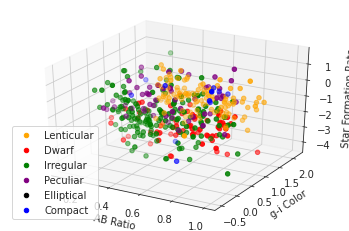

In [ ]:
#Axis vs color vs SFR
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')

ax3.scatter(Xlent.transpose()[0],Xlent.transpose()[1], Xlent.transpose()[3], c='orange', marker='o')
ax3.scatter(Xdwarf.transpose()[0],Xdwarf.transpose()[1], Xdwarf.transpose()[3], c='red', marker='o')
ax3.scatter(Xirr.transpose()[0],Xirr.transpose()[1], Xirr.transpose()[3], c='green', marker='o')
ax3.scatter(Xpec.transpose()[0],Xpec.transpose()[1], Xpec.transpose()[3], c='purple', marker='o')
ax3.scatter(Xelp.transpose()[0],Xelp.transpose()[1], Xelp.transpose()[3], c='black', marker='o')
ax3.scatter(Xcomp.transpose()[0],Xcomp.transpose()[1], Xcomp.transpose()[3], c='blue', marker='o')



ax3.legend(("Lenticular","Dwarf","Irregular","Peculiar","Elliptical","Compact"))
ax3.set_xlabel('AB Ratio')
ax3.set_ylabel('g-i Color')
ax3.set_zlabel('Star Formation Rate')

plt.show()

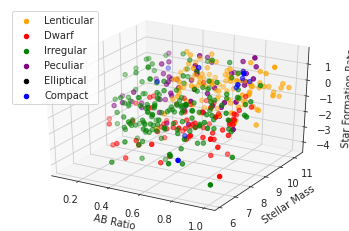

In [ ]:
#Axis vs mass vs SFR
fig4 = plt.figure()
ax4 = fig4.add_subplot(111, projection='3d')


ax4.scatter(Xlent.transpose()[0],Xlent.transpose()[2], Xlent.transpose()[3], c='orange', marker='o')
ax4.scatter(Xdwarf.transpose()[0],Xdwarf.transpose()[2], Xdwarf.transpose()[3], c='red', marker='o')
ax4.scatter(Xirr.transpose()[0],Xirr.transpose()[2], Xirr.transpose()[3], c='green', marker='o')
ax4.scatter(Xpec.transpose()[0],Xpec.transpose()[2], Xpec.transpose()[3], c='purple', marker='o')
ax4.scatter(Xelp.transpose()[0],Xelp.transpose()[2], Xelp.transpose()[3], c='black', marker='o')
ax4.scatter(Xcomp.transpose()[0],Xcomp.transpose()[2], Xcomp.transpose()[3], c='blue', marker='o')



ax4.legend(("Lenticular","Dwarf","Irregular","Peculiar","Elliptical","Compact"))
ax4.set_xlabel('AB Ratio')
ax4.set_ylabel('Stellar Mass')
ax4.set_zlabel('Star Formation Rate')

plt.show()

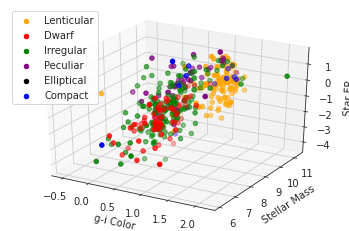

In [ ]:
#color vs mass vs SFR
fig5 = plt.figure()
ax5 = fig5.add_subplot(111, projection='3d')

#ax5.scatter(Xspiral.transpose()[1],Xspiral.transpose()[2], Xspiral.transpose()[3], c='yellow', marker='o')
ax5.scatter(Xlent.transpose()[1],Xlent.transpose()[2], Xlent.transpose()[3], c='orange', marker='o')
ax5.scatter(Xdwarf.transpose()[1],Xdwarf.transpose()[2], Xdwarf.transpose()[3], c='red', marker='o')
ax5.scatter(Xirr.transpose()[1],Xirr.transpose()[2], Xirr.transpose()[3], c='green', marker='o')
ax5.scatter(Xpec.transpose()[1],Xpec.transpose()[2], Xpec.transpose()[3], c='purple', marker='o')
ax5.scatter(Xelp.transpose()[1],Xelp.transpose()[2], Xelp.transpose()[3], c='black', marker='o')
ax5.scatter(Xcomp.transpose()[1],Xcomp.transpose()[2], Xcomp.transpose()[3], c='blue', marker='o')



#ax5.legend(("Spiral","Lenticular","Dwarf","Irregular","Peculiar","Elliptical","Compact"))
ax5.legend(("Lenticular","Dwarf","Irregular","Peculiar","Elliptical","Compact"))
ax5.set_xlabel('g-i Color')
ax5.set_ylabel('Stellar Mass')
ax5.set_zlabel('Star FR')

plt.show()

# Self Training

In [ ]:
import sklearn
sklearn.show_versions()


System:
    python: 3.7.10 (default, Feb 20 2021, 21:17:23)  [GCC 7.5.0]
executable: /usr/bin/python3
   machine: Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic

Python dependencies:
          pip: 19.3.1
   setuptools: 56.0.0
      sklearn: 0.24.2
        numpy: 1.19.5
        scipy: 1.4.1
       Cython: 0.29.22
       pandas: 1.1.5
   matplotlib: 3.2.2
       joblib: 1.0.1
threadpoolctl: 2.1.0

Built with OpenMP: True


In [ ]:
Xall_train = np.concatenate((X_train,Xunl_reft))
labels_for_rest = np.negative(np.ones(len(Xunl_reft)))
the_labels = np.copy(y_train)
Xall_trainT=Xall_train.transpose()


In [ ]:
#encoding the string labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(the_labels)
encoded_labels=le.transform(the_labels)
type(encoded_labels)
set_of_all_labels = np.concatenate((encoded_labels,labels_for_rest))
#print(set_of_all_labels[:20])
#print(set_of_all_labels[20:])
#print(len(set_of_all_labels))

In [ ]:
from sklearn.semi_supervised import SelfTrainingClassifier

In [ ]:
selfT = SelfTrainingClassifier(DF_model,criterion='k_best',k_best=10)
selfT_fitted = selfT.fit(Xall_train,set_of_all_labels)

[2021-04-29 22:45:37.948] Start to fit the model:
[2021-04-29 22:45:37.949] Fitting cascade layer = 0 
[2021-04-29 22:45:44.599] layer = 0  | Val Acc = 77.317 % | Elapsed = 6.649 s
[2021-04-29 22:45:44.629] Fitting cascade layer = 1 
[2021-04-29 22:45:56.892] layer = 1  | Val Acc = 78.443 % | Elapsed = 12.263 s
[2021-04-29 22:45:56.923] Fitting cascade layer = 2 
[2021-04-29 22:46:10.410] layer = 2  | Val Acc = 77.778 % | Elapsed = 13.487 s
[2021-04-29 22:46:10.411] Early stopping counter: 1 out of 2
[2021-04-29 22:46:10.441] Fitting cascade layer = 3 
[2021-04-29 22:46:24.253] layer = 3  | Val Acc = 78.085 % | Elapsed = 13.811 s
[2021-04-29 22:46:24.254] Early stopping counter: 2 out of 2
[2021-04-29 22:46:24.254] Handling early stopping
[2021-04-29 22:46:24.271] The optimal number of layers: 2
[2021-04-29 22:46:24.296] Start to evalute the model:
[2021-04-29 22:46:24.298] Evaluating cascade layer = 0 
[2021-04-29 22:46:25.108] Evaluating cascade layer = 1 


AttributeError: ignored

In [ ]:
selfT_RF = SelfTrainingClassifier(RF_model,criterion='k_best',k_best=10)
selfT_RF_fitted = selfT_RF.fit(Xall_train,set_of_all_labels)

In [ ]:
y_pred_DF = selfT.predict(X_test)

In [ ]:
y_pred_RF = selfT_RF.predict(X_test)

In [ ]:
selfT_acc_DF = accuracy_score(le.transform(y_test),y_pred_DF)
selfT_acc_RF = accuracy_score(le.transform(y_test),y_pred_RF)

In [ ]:
print('Accuracy score for the self-training DF model: ', selfT_acc_DF)
print('Accuracy score for the self-training RF model: ', selfT_acc_RF)

In [ ]:
print(type(y_test[5]))
print(type(y_pred_DF[5]))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_DF))

# Data Visualization

In [ ]:
def galactic2radians(galactic):
    
    radians = [np.radians(galactic) - 2*np.pi if np.radians(galactic) > np.pi else np.radians(galactic)]
    return radians

def gal2rad_array(gal_array):
    
    rad_conv = [x - 2*np.pi if x > np.pi else x for x in gal_array]
    return rad_conv

def galactic_plane(str):
    
    lon_array = np.arange(0,360)
    lat=0.
    longitudes = []
    latitudes=[]
    gal_RA=[]
    gal_Dec=[]

    for lon in lon_array:
        gal = SkyCoord(lon*u.degree, lat*u.degree, frame='galactic')
        eq = gal.transform_to('fk5')
        longitudes.append((gal.l).degree)
        latitudes.append((gal.b).degree)
        gal_RA.append((eq.ra).degree)
        gal_Dec.append((eq.dec).degree)
        
    if str=='galactic':
        return [[longitudes[i], latitudes[i]] for i in range(len(longitudes))]
    elif str == 'equatorial':
        return [[gal_RA[i], gal_Dec[i]] for i in range(len(gal_RA))]
    else:
        raise (ValueError, "acceptable input is either galactic or equatorial.")
        
        
def scatter_plt(str, ra, dec, **kwargs):
    
    if isinstance(ra, (int, float, np.float64))==True:
        
        x = ra
        y = dec
        
        if str == "CEL":
            x = np.radians(x)
            y = np.radians(y)
            x = np.pi - x

        if str == "GAL":
            
            x = np.radians(x)
            y = np.radians(y)
            x = [x - 2*np.pi if x > np.pi else x]
    else:
        x = np.array(ra) 
        y = np.array(dec)
        
        if str == "CEL":
            x = np.radians(x)
            y = np.radians(y)
            x = np.pi -x
        
        if str == "GAL":
            
            x = np.radians(x)
            y = np.radians(y)
            x = [xx - 2*np.pi if xx > np.pi else xx for xx in x]
                

    return ax.scatter(x, y, **kwargs)
    
def plot_plt(str, ra, dec, **kwargs):
        
        x = np.array(ra) 
        y = np.array(dec) 

        if str == "CEL":
            x = np.radians(x)
            y = np.radians(y)
            x = np.pi - x

        if str == "GAL":
            if isinstance(x, (list, tuple, np.ndarray))==True:
                x = np.radians(x)
                y = np.radians(y)
                x = [xx - 2*np.pi if xx > np.pi else xx for xx in x]
            else:
                x = np.radians(x)
                y = np.radians(y)
                x = [x - 2*np.pi if x > np.pi else x]

        return ax.plot(x, y, **kwargs)

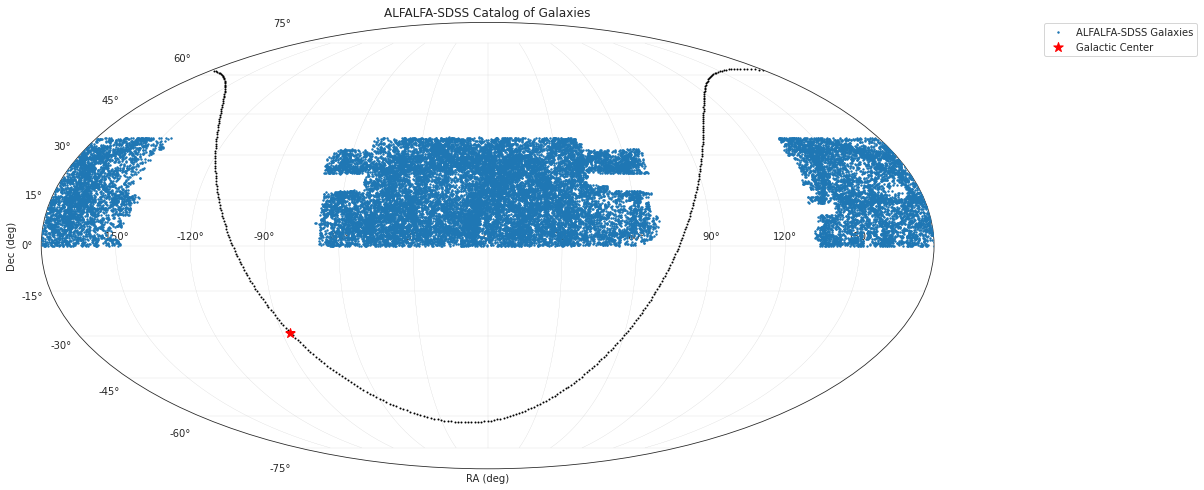

In [ ]:
GC_lon = galactic2radians(359.94425)
GC_lat = galactic2radians(-00.04616)

GP_eq = galactic_plane('equatorial')

#print(GP_eq[0][1])

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection='mollweide')

for i in range(len(GP_eq)):
    scatter_plt('CEL', GP_eq[i][0], GP_eq[i][1], s=1, c='k')
    

ra = table2array(table1_data, 'RA')
dec = table2array(table1_data, 'DEC')


scatter_plt('CEL', ra, dec, s=2, zorder = 15, label='ALFALFA-SDSS Galaxies')
scatter_plt('CEL', GP_eq[0][0], GP_eq[0][1], s=100,marker='*', c='r', zorder = 15, label='Galactic Center')
#scatter_plt('CEL', 80.8917, -69.7561, s=30, marker='+',c='b', zorder = 15, label='Large Magellanic Cloud')
#scatter_plt('CEL', 13.1583, -72.8003, s=30, marker='+',c='c', zorder = 15,label='Small Magellanic Cloud')

#tick_labels = np.array([330, 300, 270, 240, 210, 180, 150, 120, 90, 60, 30, 0])

#ax.set_xticklabels(tick_labels)
ax.set_xlabel('RA (deg)')
ax.set_ylabel('Dec (deg)')
ax.set_title('ALFALFA-SDSS Catalog of Galaxies')

ax.grid(lw=0.25)
ax.legend(bbox_to_anchor=(1.3, 1.01),loc='upper right')
fig.savefig('./alfalfa_sdss_skymap.pdf',bbox_inches='tight')

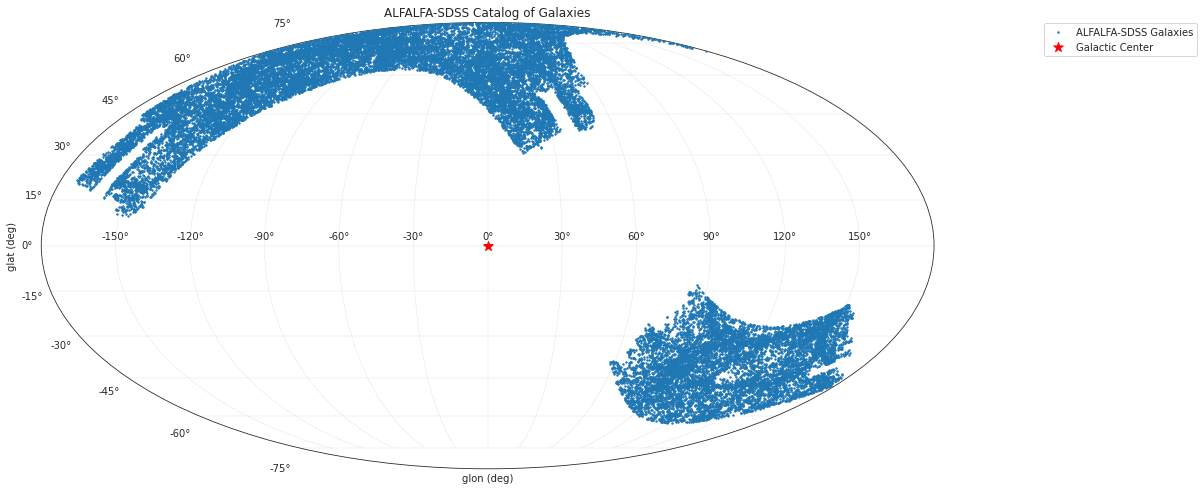

In [ ]:
GP_gal = galactic_plane('galactic')

for i in range(len(GP_gal)):
    scatter_plt('GAL', GP_gal[i][0], GP_gal[i][1], s=1, c='k')


fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection='mollweide')


alfalfa_sdss = SkyCoord(ra, dec, frame='fk5', unit=(u.degree,u.degree))

alfalfa_sdss_cat_galactic = alfalfa_sdss.transform_to('galactic')    
    
alfalfa_sdss_lon = alfalfa_sdss_cat_galactic.l
alfalfa_sdss_lat = alfalfa_sdss_cat_galactic.b

scatter_plt('GAL', alfalfa_sdss_lon, alfalfa_sdss_lat, s=2, zorder = 15, label='ALFALFA-SDSS Galaxies')
scatter_plt('GAL', GP_gal[0][0], GP_gal[0][1], s=100,marker='*', c='r', zorder = 15, label='Galactic Center')
#scatter_plt('GAL', 280.4652, -32.8884, s=30, marker='+', c='b', zorder = 15, label='Large Magellanic Cloud')
#scatter_plt('GAL', 302.8084, -44.3277, s=30, marker='+', c='c', zorder = 15,label='Small Magellanic Cloud')

#tick_labels = np.array([330, 300, 270, 240, 210, 180, 150, 120, 90, 60, 30, 0])

#ax.set_xticklabels(tick_labels)
ax.set_xlabel('glon (deg)')
ax.set_ylabel('glat (deg)')
ax.set_title('ALFALFA-SDSS Catalog of Galaxies')

ax.grid(lw=0.25)
ax.legend(bbox_to_anchor=(1.3, 1.01),loc='upper right')
fig.savefig('./alfalfa_sdss_gal.pdf',bbox_inches='tight')

In [ ]:
plt.rcParams.update({'font.size': 28})
fig = plt.figure(figsize=(42,24))
ax = fig.add_subplot(111)
ax.hist(morph,bins='auto',histtype='bar', ec='black')
ax.set_title('Distribution of galaxy morphologies in 10% of the training set')
fig.autofmt_xdate(rotation=0)
plt.savefig('./morph_hist.pdf')